# AUTOENCODER LINEAR


In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.10.0'

In [77]:
from tensorflow.keras.datasets import mnist


(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()

In [78]:
x_treinamento.shape, y_treinamento.shape



((60000, 28, 28), (60000,))

In [79]:
x_teste.shape, y_teste.shape

((10000, 28, 28), (10000,))

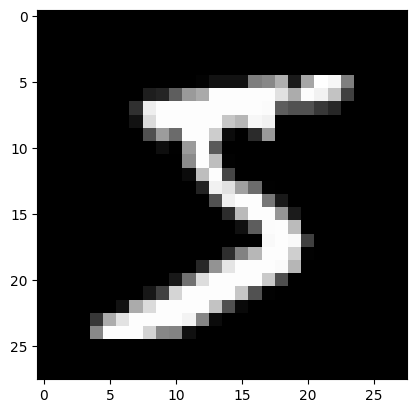

In [80]:
plt.imshow(x_treinamento[0], cmap='grey')

4


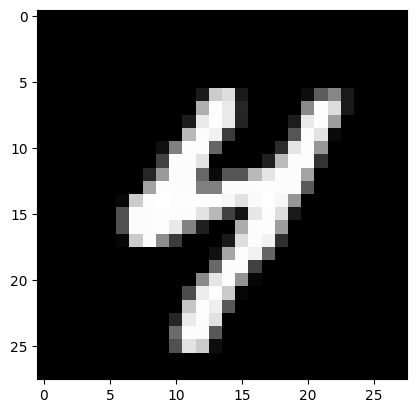

In [81]:
random = np.random.randint(0, x_treinamento.shape[0])
print(y_treinamento[random])
plt.imshow(x_treinamento[random], cmap='grey')

### Mostrando imgs aleatorias no plt

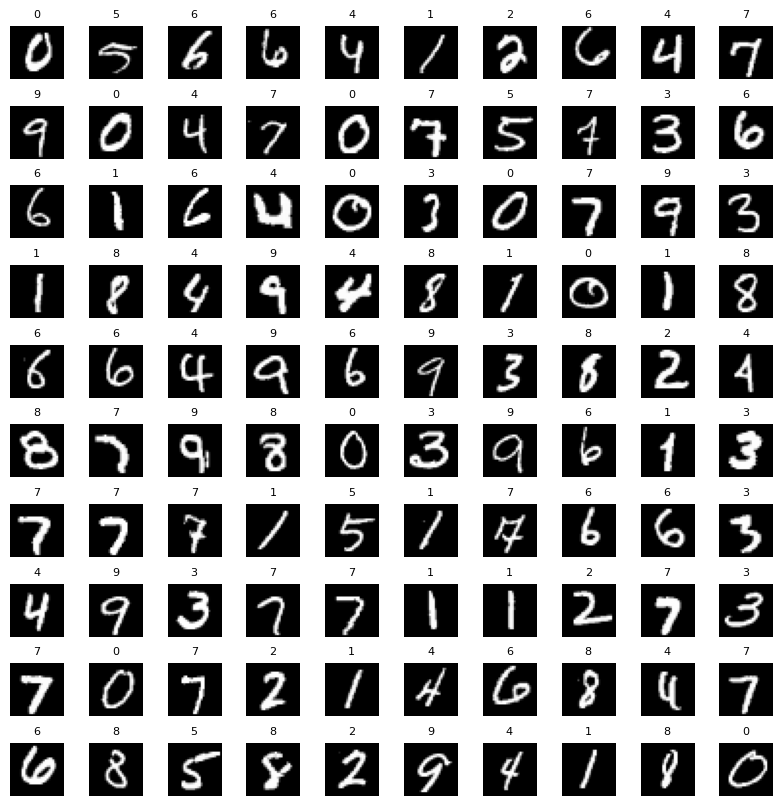

In [82]:
altura = 10
largura = 10

figure, axes = plt.subplots(altura, largura, figsize=(10, 10))
axes = axes.ravel()# (10, 10) -> [100]
axes.shape

for i in np.arange(0, altura * largura):
    indice = np.random.randint(0, x_treinamento.shape[0])
    axes[i].imshow(x_treinamento[indice], cmap='grey')
    axes[i].axis('off')
    axes[i].set_title(y_treinamento[indice], fontsize=8)

plt.subplots_adjust(hspace=0.5, wspace=0.2)


PRE PROCESSAMENTO DAS IMGS

In [83]:
x_treinamento = x_treinamento / 255
x_teste = x_teste / 255

print(x_treinamento.max(), x_treinamento.min(), x_teste.max(), x_teste.min())






1.0 0.0 1.0 0.0


transformando a matriz da img em um vetor apenas

In [86]:
x_treinamento = x_treinamento.reshape(x_treinamento.shape[0], 784)
x_teste = x_teste.reshape(x_teste.shape[0], 784)

x_treinamento.shape, x_teste.shape

((60000, 784), (10000, 784))

# Construção e treinamento do autoenconder linear

In [ ]:
#(img original) 784 -> 128 -> 64 -> 32 (img codificada)  -> 64 -> 128 -> 784 (decodificada)

In [ ]:
autoencoder = Sequential()

#codificacao
autoencoder.add(Dense(128, activation='relu', input_shape=(784,)))
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(32, activation='relu')) #img codificada
#decofificacao
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(128, activation='relu'))
#como o autoencodere deve retornar o valor do pixel para decodificao então vai  ser binario entre 0 e 1 ou seja, sigmoid
autoencoder.add(Dense(784, activation='sigmoid')) #img decodificada

autoencoder.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [93]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#como queremos reconstruir a propria imagem, o segundo parametro onde seria o rotulo vai ser o proprio vetor das imgs
#já que o y_treinamento tem apenas os valores antes da decodificacao 
autoencoder.fit(x_treinamento, x_treinamento, epochs=50, batch_size=256, validation_data=(x_teste, None))


Epoch 1/50
235/235 [==============================] - 4s 11ms/step - loss: 0.2491 - accuracy: 0.0088 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1511 - accuracy: 0.0106 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1332 - accuracy: 0.0112 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1230 - accuracy: 0.0107 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1171 - accuracy: 0.0111 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1128 - accuracy: 0.0117 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1095 - accuracy: 0.

## Criando o enconder para codificar a img 

In [103]:
autoencoder.get_layer('dense_4').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_4')>

In [124]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_2_input')>

In [ ]:
#modelo de enconder vai ter o input do autoenconder e output até a camada onde fica a img decodificada
enconder =  Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('dense_4').output)
enconder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2_input (InputLayer)  [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 25ms/step


(1, 32)

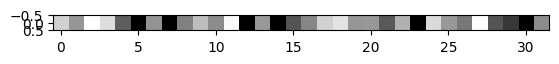

In [139]:
index_tst = np.random.randint(0, x_teste.shape[0])
img_tst = x_teste[index_tst]
plt.imshow(img_tst.reshape(28, 28), cmap='gray')
img_tst = img_tst.reshape(1, -1)#reshape para add o batch

enconder_img = enconder.predict(img_tst) 
plt.imshow(enconder_img, cmap='gray')
enconder_img.shape



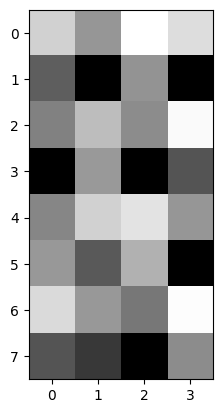

In [140]:
#representacao da img codificada
plt.imshow(enconder_img.reshape(8, 4), cmap='gray') #4x8 = 32

### Até aqui, fizemos o autoencoder para codificacao e decodificao da img. Criamos o primeiro modelo para receber um input e codificar a img usando os layers do autoencoder

# Agora, fazendo o modelo de decoder usando os layers do autoencoder

In [141]:
input_layer_decoder = Input(shape=(32,))
decoder_layers = autoencoder.get_layer('dense_5')(input_layer_decoder)

autoencoder.get_layer('dense_5').input, autoencoder.get_layer('dense_5').output

(<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_4')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_5')>)

In [142]:
decoder_layers = autoencoder.get_layer('dense_6')(decoder_layers)
decoder_layers = autoencoder.get_layer('dense_7')(decoder_layers)

decoder = Model(input_layer_decoder, decoder_layers)
decoder.summary()
#decoder.predict(enconder_img)



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32)]              0         
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


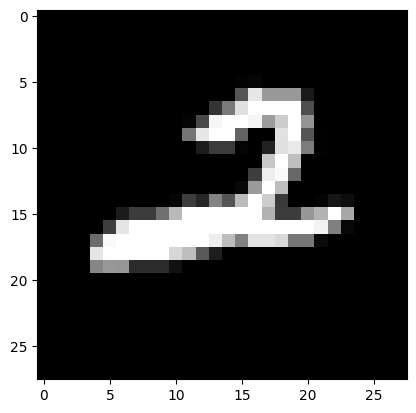

In [143]:
#imagem original da base de dados
plt.imshow(x_teste[index_tst].reshape(28, 28), cmap='gray')

1/1 [==============================] - 0s 48ms/step


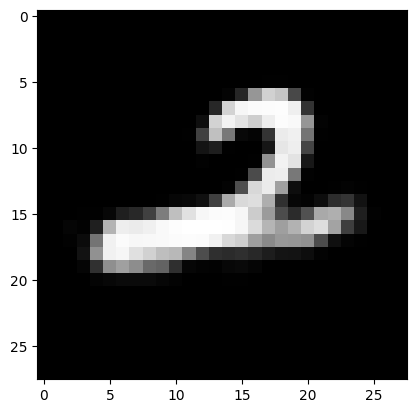

In [144]:
img_decodificada = decoder.predict(enconder_img)
plt.imshow(img_decodificada.reshape(28, 28), cmap='gray')